In [78]:
import numpy as np
import matplotlib.pyplot as plt
import math
import pandas as pd
from scipy import signal
import pickle
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
import random
import tensorflow as tf
import cv2
from scipy import stats



# Read Depth Camera

In [79]:
# For reading depth camera
def read_depth_camera(dcamera_path, show_video, n_resize):
    video  = cv2.VideoCapture(dcamera_path)
    ret, frame = video.read()
    
    # Get total # of frame count 
    frame_count = int(video.get(cv2.CAP_PROP_FRAME_COUNT))
        
    frame_height = int(frame.shape[0])
    frame_width = int(frame.shape[1])

    
    depth_frames = np.empty((frame_count, int(frame_height/n_resize), int(frame_width/n_resize)))
    
    count = 0
    while (video.isOpened()):
        ret, frame = video.read()
        
        if ret == True:
            gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
            gray_frame = cv2.resize(gray_frame, \
                                    (int(frame_width/n_resize), int(frame_height/n_resize)),\
                                    interpolation = cv2.INTER_AREA)

            depth_frames[count] = gray_frame
            if show_video == True:
                cv2.imshow("Depth", gray_frame)
                if cv2.waitKey(1) & 0xFF == ord('q'):
                    break
            count = count + 1
        else: 
            break
            

    video.release()
    #cv2.destroyAllWindows()
    return depth_frames

In [80]:
def play_video(read_frames):

    for i in range(len(read_frames)):
        # Capture frame-by-frame
        frame = read_frames[i]

        # Display the resulting frame
        plt.imshow(frame)
#         if cv2.waitKey(1) & 0xFF == ord('q'):
#             break
    #cv2.destroyAllWindows()

    return

In [81]:
def show_frame(read_frames, frame_range):
      # Capture frame-by-frame

    # Display the resulting frame
    for i in frame_range:
        fig = plt.figure(figsize=(6,6))        
        a = plt.imshow(read_frames[i])
        
    return

In [82]:

n_test = 24
date = '11_15_2020'
test_str = '/test' + str(n_test)
#data_dir = r"C:\Users\77bis\Box\CS598 - Final Project\Preliminary Data V4\Test_Subject_Leo" + test_str
data_dir = "/home/asilador/CS598/CS598-FinalProject/Preliminary Data V4/Test_Subject_Leo" + test_str

train_dcamera_path = data_dir + '/depth_processed_leo_test'+str(n_test)+'.avi'
show_video = 0
n_resize = 1
x_train = read_depth_camera(train_dcamera_path, show_video, n_resize)


# read fdss data

In [6]:
#### Removed due to possible syncing/noise issue
# n_test = 24
# date = '11_15_2020'
# test_str = 'test' + str(n_test)
# #data_dir = r"C:\Users\77bis\Box\CS598 - Final Project\Preliminary Data V4\Test_Subject_Leo" + test_str
# data_dir = "/home/asilador/CS598/CS598-FinalProject/Preliminary Data V4/Test_Subject_Leo" + "/" + test_str + "/fcss_processed_leo_" + test_str + "_" + date + ".txt"
# tmpdata = pd.read_csv(data_dir)

In [7]:
# tmpdata.head()

# Read Output Data


In [83]:
def read_output_data(qtm_file_data, theta):
    if theta=='x':
        qtm_data = pd.read_csv(qtm_file_data, usecols = ["Lean Left/Right Angle (deg)"])
    if theta=='y':
        qtm_data = pd.read_csv(qtm_file_data, usecols = ["Lean Forward/Backwards Angle (deg)"])
    if theta=='z':
        qtm_data = pd.read_csv(qtm_file_data, usecols = ["Torso Twist Angle (deg)"])
        
    
    return qtm_data


In [84]:
n_test = 24
date = '11_15_2020'
test_str = '/test' + str(n_test)
# data_dir = r"C:\Users\77bis\Box\CS598 - Final Project\Preliminary Data V4\Test_Subject_Leo" + test_str
data_dir = "/home/asilador/CS598/CS598-FinalProject/Preliminary Data V4/Test_Subject_Leo" + test_str
qtm_file_data_dir = data_dir + '/qtm_processed_leo_test' + str(n_test) + '_' + date + '.txt'
show_qtm_plot = True
theta_interest = 'z'
y_train = read_output_data(qtm_file_data_dir,theta_interest).values
theta_x = read_output_data(qtm_file_data_dir,'x').values
theta_y = read_output_data(qtm_file_data_dir,'y').values
theta_z = read_output_data(qtm_file_data_dir,'z').values

In [85]:
y_train.shape

(12751, 1)

In [86]:
# Obtain X and Y data
#x_train and tmpdata
#y is y_train
x_train.shape
xtrainnew = pd.DataFrame(data=np.reshape(x_train, (x_train.shape[0],x_train.shape[1]*x_train.shape[2])))
yframe = pd.DataFrame(data=y_train)
# TheData = pd.concat([xtrainnew,tmpdata,yframe],axis=1)
TheData = pd.concat([xtrainnew,yframe],axis=1) #only contains video data

In [87]:
TheData

,0,1,2,3,4,5,6,7,8,9,...,19191,19192,19193,19194,19195,19196,19197,19198,19199,0
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,138.0,147.0,133.0,137.0,139.0,142.0,132.0,151.0,149.0,-1.584851
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,138.0,141.0,146.0,124.0,130.0,137.0,150.0,132.0,137.0,-1.610322
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,136.0,145.0,121.0,140.0,135.0,148.0,128.0,153.0,136.0,-1.652665
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,137.0,141.0,138.0,136.0,130.0,143.0,142.0,143.0,151.0,-1.693261
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,135.0,135.0,136.0,127.0,140.0,142.0,138.0,144.0,138.0,-1.730152
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12746,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,121.0,133.0,114.0,133.0,128.0,137.0,3.0,2.0,4.0,1.691579
12747,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,121.0,108.0,131.0,133.0,139.0,136.0,0.0,1.0,13.0,1.755819
12748,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,122.0,110.0,129.0,138.0,132.0,141.0,0.0,1.0,8.0,1.785816
12749,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,124.0,124.0,130.0,125.0,127.0,0.0,0.0,0.0,14.0,1.791356


In [88]:
# xtmp = xtrainnew[300,:]
# plt.imshow(np.reshape(xtmp, (x_train.shape[1],x_train.shape[2])))

In [ ]:
nsamps = TheData.shape[0]
n80p = int(np.floor(nsamps*0.8))
rannums = np.array(random.sample(range(1,nsamps,1), n80p))
s_nfiles = np.arange(nsamps)
test_set = np.setdiff1d(s_nfiles,rannums)

#

In [89]:
Trainset = TheData.iloc[rannums,:]
Testset = TheData.iloc[test_set,:]

In [90]:
sc_X = StandardScaler()
sc_y = StandardScaler()

In [91]:
Xtrainz = Trainset.iloc[:,:-1].values
ytrainz = Trainset.iloc[:,-1:].values
X = sc_X.fit_transform(Xtrainz)
y = sc_y.fit_transform(ytrainz)

# Regress using Neural Network

In [92]:
X.shape #7min*30fps*60s/min*0.8 ~ 10800

(10200, 19200)

In [94]:
# Create Neural Netowrk
model = tf.keras.Sequential()
model.add(tf.keras.Input(shape=(X.shape[1],)))
model.add(tf.keras.layers.Dense(100, activation="relu"))
model.add(tf.keras.layers.Dense(100, activation="relu"))
model.add(tf.keras.layers.Dense(100, activation='relu')) #added extra layer. probably overkill but want good results
model.add(tf.keras.layers.Dense(1, activation='linear'))
model.compile(optimizer='adam',
              loss='mae',
              metrics=['mse','mae'])
    
# loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
# loss_fn(y_train[:1], predictions).numpy()

epochs = int(30000)
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=10,restore_best_weights=True) #Moving to 1000 patience. 
history = model.fit(X, y, epochs = epochs,callbacks = [callback],verbose=1)

# model.save('depthforcemodel.h5')
#history.save('depthforcehist.h5')

Epoch 1/30000
319/319 [==============================] - 2s 5ms/step - loss: 0.9282 - mse: 2.6154 - mae: 0.9282
Epoch 2/30000
319/319 [==============================] - 2s 5ms/step - loss: 0.6593 - mse: 1.0761 - mae: 0.6593
Epoch 3/30000
319/319 [==============================] - 2s 5ms/step - loss: 0.5912 - mse: 0.8637 - mae: 0.5912
Epoch 4/30000
319/319 [==============================] - 2s 5ms/step - loss: 0.5605 - mse: 0.7779 - mae: 0.5605
Epoch 5/30000
319/319 [==============================] - 2s 5ms/step - loss: 0.5416 - mse: 0.7710 - mae: 0.5416
Epoch 6/30000
319/319 [==============================] - 2s 5ms/step - loss: 0.5178 - mse: 0.7751 - mae: 0.5178
Epoch 7/30000
319/319 [==============================] - 2s 5ms/step - loss: 0.5051 - mse: 0.7748 - mae: 0.5051
Epoch 8/30000
319/319 [==============================] - 2s 5ms/step - loss: 0.4993 - mse: 0.7612 - mae: 0.4993
Epoch 9/30000
319/319 [==============================] - 2s 5ms/step - loss: 0.4825 - mse: 0.6197 - mae:

319/319 [==============================] - 2s 5ms/step - loss: 0.1299 - mse: 0.0527 - mae: 0.1299
Epoch 74/30000
319/319 [==============================] - 2s 5ms/step - loss: 0.1267 - mse: 0.0492 - mae: 0.1267
Epoch 75/30000
319/319 [==============================] - 2s 5ms/step - loss: 0.1259 - mse: 0.0461 - mae: 0.1259
Epoch 76/30000
319/319 [==============================] - 2s 5ms/step - loss: 0.1230 - mse: 0.0467 - mae: 0.1230
Epoch 77/30000
319/319 [==============================] - 2s 5ms/step - loss: 0.1241 - mse: 0.0453 - mae: 0.1241
Epoch 78/30000
319/319 [==============================] - 2s 5ms/step - loss: 0.1179 - mse: 0.0413 - mae: 0.1179
Epoch 79/30000
319/319 [==============================] - 2s 5ms/step - loss: 0.1193 - mse: 0.0426 - mae: 0.1193
Epoch 80/30000
319/319 [==============================] - 2s 5ms/step - loss: 0.1163 - mse: 0.0393 - mae: 0.1163
Epoch 81/30000
319/319 [==============================] - 2s 5ms/step - loss: 0.1171 - mse: 0.0412 - mae: 0.117

319/319 [==============================] - 2s 5ms/step - loss: 0.0813 - mse: 0.0178 - mae: 0.0813
Epoch 146/30000
319/319 [==============================] - 2s 5ms/step - loss: 0.0800 - mse: 0.0185 - mae: 0.0800
Epoch 147/30000
319/319 [==============================] - 2s 5ms/step - loss: 0.0781 - mse: 0.0170 - mae: 0.0781
Epoch 148/30000
319/319 [==============================] - 2s 5ms/step - loss: 0.0808 - mse: 0.0183 - mae: 0.0808
Epoch 149/30000
319/319 [==============================] - 2s 5ms/step - loss: 0.0808 - mse: 0.0184 - mae: 0.0808
Epoch 150/30000
319/319 [==============================] - 2s 5ms/step - loss: 0.0794 - mse: 0.0177 - mae: 0.0794
Epoch 151/30000
319/319 [==============================] - 2s 5ms/step - loss: 0.0802 - mse: 0.0177 - mae: 0.0802
Epoch 152/30000
319/319 [==============================] - 2s 5ms/step - loss: 0.0773 - mse: 0.0162 - mae: 0.0773
Epoch 153/30000
319/319 [==============================] - 2s 5ms/step - loss: 0.0788 - mse: 0.0173 - ma

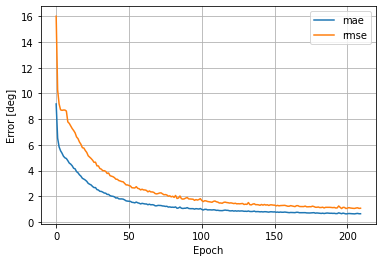

In [95]:
def plot_loss(history):
    mae = history.history['mae']*np.sqrt(sc_y.var_)
    rmse = np.sqrt(history.history['mse']*sc_y.var_)
    plt.figure()
    plt.plot(mae, label='mae')
    plt.plot(rmse, label='rmse')
    plt.xlabel('Epoch')
    plt.ylabel('Error [deg]')
    plt.legend()
    plt.grid(True)
    
plot_loss(history)


### 4-layer Network: Predict Against Training Data as a Sanity Check

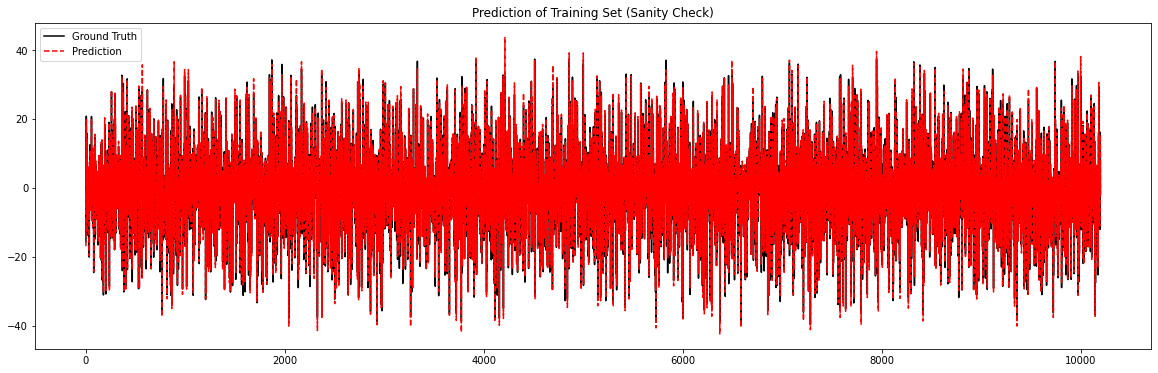

Average error is 0.09 degrees
Root Mean Squared Error is 0.56 degrees
Mean Absolute Error is 0.56 degrees


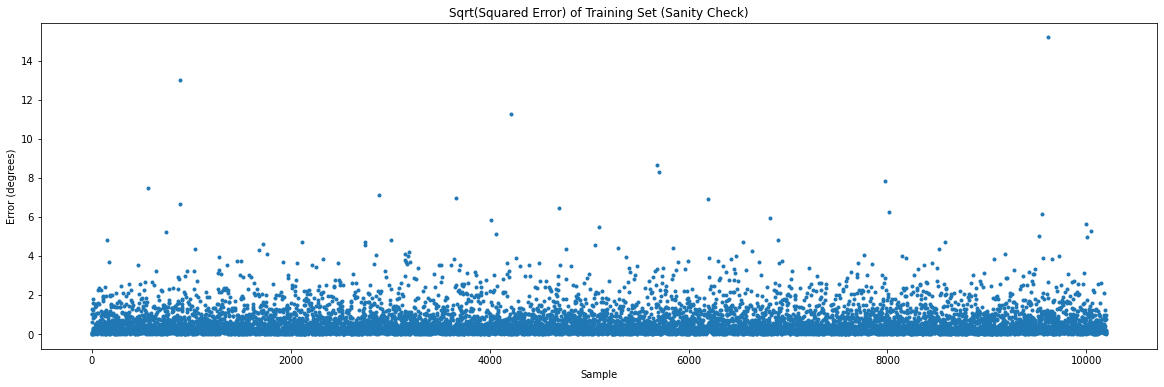

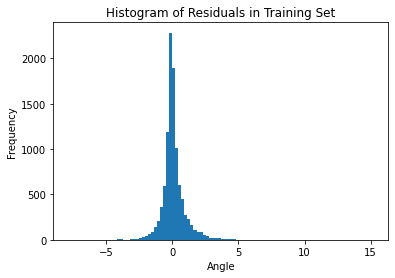

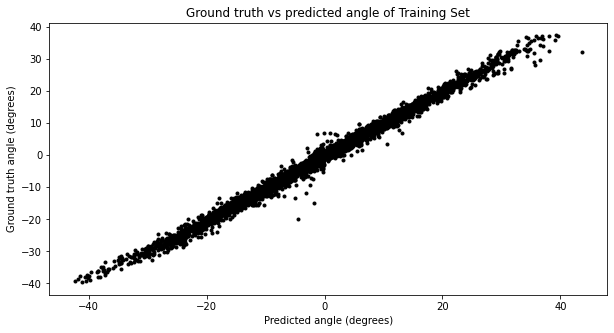

In [96]:

# sanity check with 80% data
Xtrain = Trainset.iloc[:,:-1].values
Xtrain = sc_X.transform(Xtrain)
y_pred = model.predict(Xtrain)
#y_pred = sc_y.inverse_transform(y_pred)
y_pred = sc_y.inverse_transform(y_pred)
y_new = Trainset.iloc[:,-1:].values
plt.figure(figsize=(20,6))
plt.plot(y_new,'k')
plt.plot(y_pred,'r--')
plt.title('Prediction of Training Set (Sanity Check)')
#plt.axis([xmin, xmax, ymin, ymax])
plt.legend(labels=['Ground Truth','Prediction'])
plt.show()
# Squared-root of Squared Error

test_error = (y_pred - y_new)
print('Average error is {:4.2f} degrees'.format(np.sum(test_error)/test_error.shape[0]))
rmse = np.sqrt(test_error**2)
print('Root Mean Squared Error is {:4.2f} degrees'.format(np.sum(rmse)/test_error.shape[0]))
# Mean absolute error
print('Mean Absolute Error is {:4.2f} degrees'.format(np.sum(np.abs(test_error))/test_error.shape[0]))
plt.figure(figsize=(20,6))
plt.plot(rmse,'.')
plt.title('Sqrt(Squared Error) of Training Set (Sanity Check)')
plt.xlabel('Sample')
plt.ylabel('Error (degrees)')
plt.show()

plt.figure()
plt.hist(test_error,bins=100)
plt.title('Histogram of Residuals in Training Set')
plt.xlabel('Angle')
plt.ylabel('Frequency')
plt.show()

#plot scatterplot of data
plt.figure(figsize=(10,5))
plt.scatter(y_pred,y_new,marker='.',color='black')
plt.xlabel('Predicted angle (degrees)')
plt.ylabel('Ground truth angle (degrees)')
plt.title('Ground truth vs predicted angle of Training Set')
plt.show()

### 4-layer Neural Network: Predict Test Set

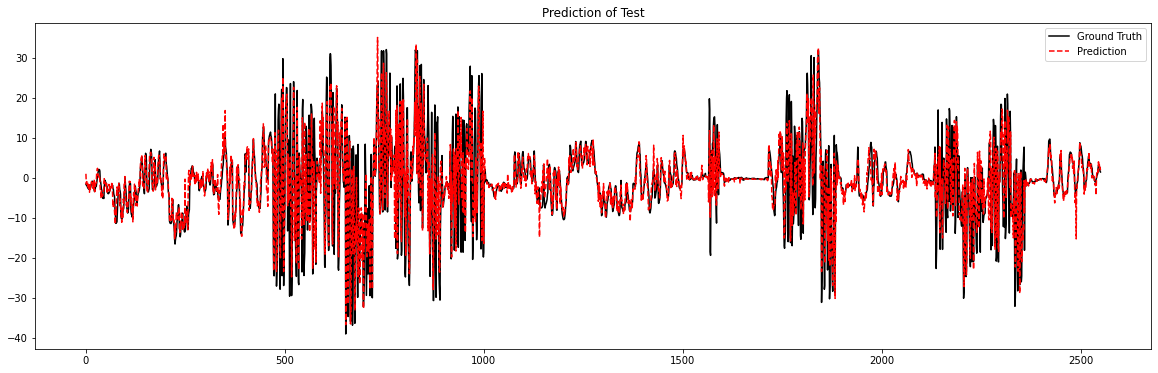

Average error is 0.35 degrees
Root Mean Squared Error is 3.38 degrees
Mean Absolute Error is 3.38 degrees


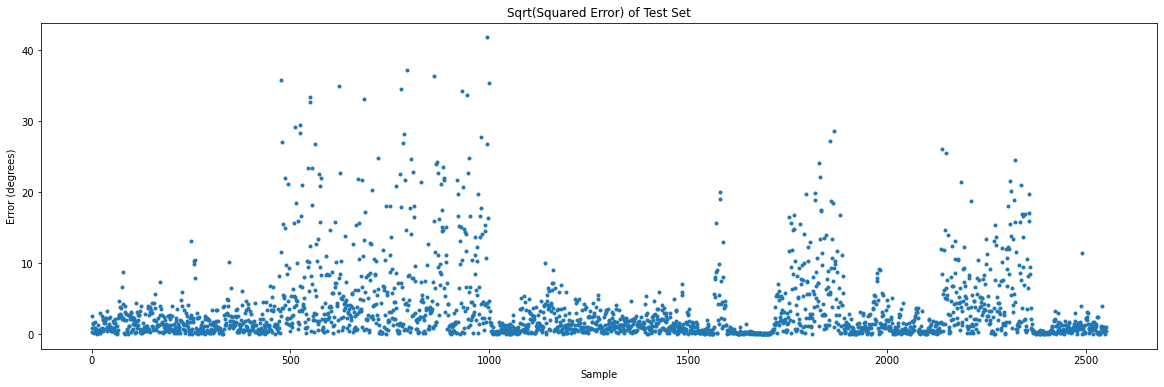

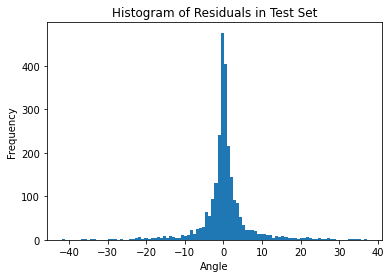

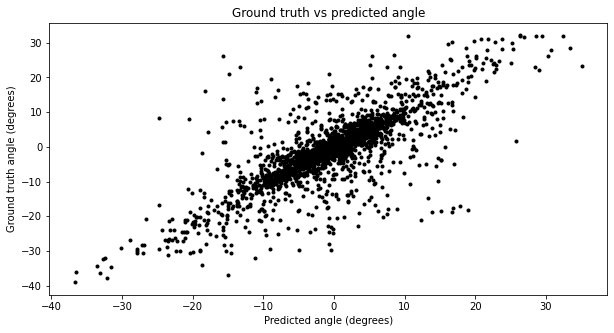

In [97]:
# Redo test set
Xtest = Testset.iloc[:,:-1].values
Xtest = sc_X.transform(Xtest)
y_pred = model.predict(Xtest)
y_pred = sc_y.inverse_transform(y_pred)
y_new = Testset.iloc[:,-1:].values

plt.figure(figsize=(20,6))
plt.plot(y_new,'k')
plt.plot(y_pred,'r--')
plt.title('Prediction of Test')
#plt.axis([xmin, xmax, ymin, ymax])
plt.legend(labels=['Ground Truth','Prediction'])
plt.show()

# Squared-root of Squared Error

test_error = (y_pred - y_new)
print('Average error is {:4.2f} degrees'.format(np.sum(test_error)/test_error.shape[0]))
rmse = np.sqrt(test_error**2)
print('Root Mean Squared Error is {:4.2f} degrees'.format(np.sum(rmse)/test_error.shape[0]))
# Mean absolute error
print('Mean Absolute Error is {:4.2f} degrees'.format(np.sum(np.abs(test_error))/test_error.shape[0]))
plt.figure(figsize=(20,6))
plt.plot(rmse,'.')
plt.title('Sqrt(Squared Error) of Test Set')
plt.xlabel('Sample')
plt.ylabel('Error (degrees)')
plt.show()

plt.figure()
plt.hist(test_error,bins=100)
plt.title('Histogram of Residuals in Test Set')
plt.xlabel('Angle')
plt.ylabel('Frequency')
plt.show()

#plot scatterplot of data
plt.figure(figsize=(10,5))
plt.scatter(y_pred,y_new,marker='.',color='black')
plt.xlabel('Predicted angle (degrees)')
plt.ylabel('Ground truth angle (degrees)')
plt.title('Ground truth vs predicted angle')
plt.show()

In [69]:
save_notebookparams = 1
if save_notebookparams:
    pkl_filename = "depthforcemodelparam_nn4.pkl"
    randata = {}
    randata['nsamps']=nsamps
    randata['n80p']=n80p
    randata['rannums']=rannums
    randata['test_set']=test_set
    modelhistory = history.history
    
    
    with open(pkl_filename, 'wb') as file:
        pickle.dump([randata,sc_X,sc_y,modelhistory], file)
        
    model.save('depthforcemodel_nn4.h5') 